In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./data/linear-reg/train.csv')
df_test = pd.read_csv('./data/linear-reg/test.csv')

In [3]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
len(df_train)

700

In [5]:
df_train = df_train.dropna(axis=0)

In [6]:
len(df_test)

300

In [7]:
df_train.iloc[0]['y']

21.54945196

In [8]:
len(df_train)

699

In [9]:
# since our model just takes in data in an array, we'll feed in data as an array

In [10]:
x_train = []
x_test = []
y_train = []
y_test = []

for i in range(len(df_train)):
    x_train.append(df_train.iloc[i]['x'])
    y_train.append(df_train.iloc[i]['y'])

In [11]:
x_train[:10]

[24.0, 50.0, 15.0, 38.0, 87.0, 36.0, 12.0, 81.0, 25.0, 5.0]

In [12]:
y_train[:10]

[21.54945196,
 47.46446305,
 17.21865634,
 36.58639803,
 87.28898389,
 32.46387493,
 10.78089683,
 80.76339859999999,
 24.61215147,
 6.963319071]

In [13]:
for i in range(len(df_test)):
    x_test.append(df_test.iloc[i]['x'])
    y_test.append(df_test.iloc[i]['y'])

In [14]:
x_test[:10]

[77.0, 21.0, 22.0, 20.0, 36.0, 15.0, 62.0, 95.0, 20.0, 5.0]

In [15]:
y_test[:10]

[79.77515201,
 23.17727887,
 25.60926156,
 17.85738813,
 41.84986439,
 9.805234876,
 58.87465933,
 97.61793701,
 18.39512747,
 8.746747654]

In [16]:
# now to convert them to a numpy array. this step is not needed, but i'll do it anyway

In [17]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
print(f'x train: {len(x_train)}, y train: {len(y_train)}\n')
print(f'x test: {len(x_test)}, y test: {len(y_test)}')

x train: 699, y train: 699

x test: 300, y test: 300


In [19]:
# now for some plots

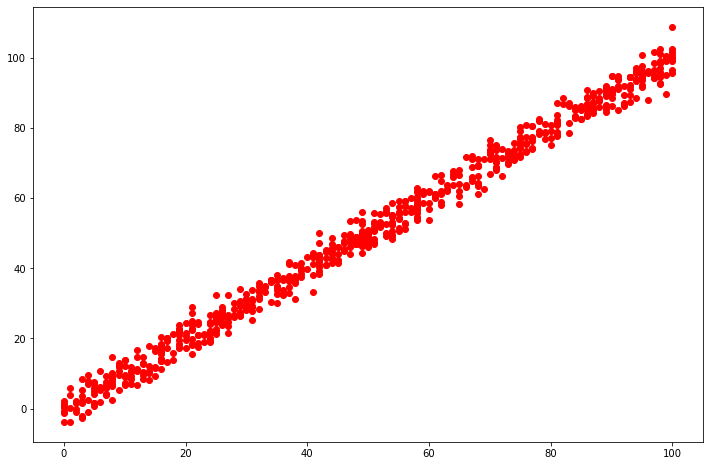

In [20]:
plt.figure(figsize=(12, 8))

plt.plot(x_train, y_train, 'ro')
plt.show()

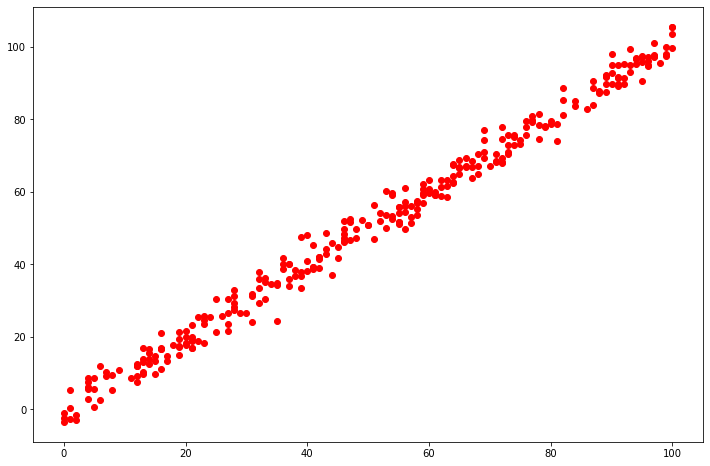

In [21]:
plt.figure(figsize=(12, 8))

plt.plot(x_test, y_test, 'ro')
plt.show()

In [22]:
# now unlike the other notebook, i'll try to define functions for faster calculations

In [23]:
def find_summation(decider):
    if decider == 'train':
        sx = np.sum(x_train)
        sy = np.sum(y_train)
        sx2 = np.sum(x_train**2)
        sx3 = np.sum(x_train**3)
        sx4 = np.sum(x_train**4)
        sxy = np.sum(x_train*y_train)
        sx2y = np.sum((x_train**2)*y_train)

        return [sx, sy, sx2, sx3, sx4, sxy, sx2y]
    else:
        sx = np.sum(x_test)
        sy = np.sum(y_test)
        sx2 = np.sum(x_test**2)
        sx3 = np.sum(x_test**3)
        sx4 = np.sum(x_test**4)
        sxy = np.sum(x_test*y_test)
        sx2y = np.sum((x_test**2)*y_test)
        return [sx, sy, sx2, sx3, sx4, sxy, sx2y]

In [24]:
[sx, sy, sx2, sx3, sx4, sxy, sx2y] = find_summation('train')

In [25]:
b = np.array([sy, sxy, sx2y])
a = np.array([[len(x_train), sx, sx2], [sx, sx2, sx3], [sx2, sx3, sx4]])

In [26]:
a

array([[6.99000000e+02, 3.49600000e+04, 2.33368000e+06],
       [3.49600000e+04, 2.33368000e+06, 1.76380144e+08],
       [2.33368000e+06, 1.76380144e+08, 1.42874588e+10]])

In [27]:
b

array([3.49079686e+04, 2.33146178e+06, 1.76174490e+08])

In [28]:
roots = np.linalg.solve(a, b)

In [29]:
def predict(x_new):
    x_sq = x_new**2
    pred = roots[0] + roots[1]*x_new + roots[2]*x_sq
    # print(f'pred: {pred}')
    return pred

In [30]:
max(x_train)

100.0

In [31]:
min(x_train)

0.0

In [32]:
x_test[10]

4.0

In [33]:
y_test[10]

2.811415826

In [34]:
predict(4)

3.659833869411577

In [35]:
# the right answer was two, but the model has given 3. Hmm... sounds kinda close

In [36]:
pred = []

def predict_array(x_pred):
    for i in range(len(x_pred)):
        x_sq = x_pred[i]**2
        pred.append(roots[0] + roots[1]*x_pred[i] + roots[2]*x_sq)

    return pred

In [37]:
y_pred = predict_array(x_test)

In [38]:
y_pred[:5]

[76.97097074481941,
 20.8960929104336,
 21.906893394830828,
 19.88494830311958,
 36.02196727012893]

In [39]:
y_test[:5]

array([79.77515201, 23.17727887, 25.60926156, 17.85738813, 41.84986439])

In [40]:
# The values seem to match to some extent, considering this is all implemented from scratch.

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
np.sqrt(mse(y_test, y_pred))

3.0763037098292334

In [45]:
x_plot = np.array(range(101))

In [46]:
x_plot

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [47]:
y_plot = []

for i in range(len(x_plot)):
    x_sq = x_plot[i]**2
    y_plot.append(roots[0] + roots[1]*x_plot[i] + roots[2]*x_sq)

In [51]:
y_plot = np.array(y_plot)
y_plot[:5]

array([-0.41020966,  0.60781741,  1.62550035,  2.64283917,  3.65983387])

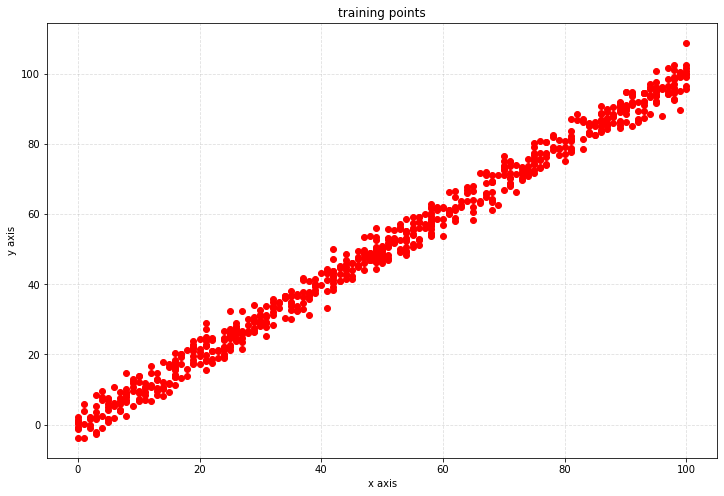

In [54]:
plt.figure(figsize=(12, 8))

plt.plot(x_train, y_train, 'ro')
plt.title('training points')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.grid(alpha=.4,linestyle='--')
plt.show()

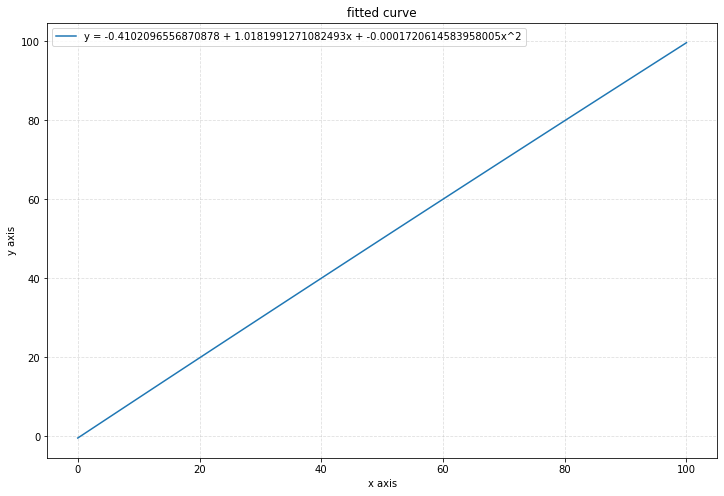

In [56]:
plt.figure(figsize=(12, 8))

plt.plot(x_plot,y_plot,label=f'y = {roots[0]} + {roots[1]}x + {roots[2]}x^2')

plt.title('fitted curve')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.grid(alpha=.4,linestyle='--')

plt.legend()
plt.show()